# Ingest for pancreas data

In [1]:
import scanpy as sc

In [2]:
sc.settings.verbosity = 2             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, frameon=False)

/Users/alexwolf/miniconda3/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


scanpy==1.4.5.dev264+gcf3b626 anndata==0.7rc1 umap==0.3.8 numpy==1.16.3 scipy==1.3.0 pandas==0.23.4 scikit-learn==0.22 statsmodels==0.10.0 python-igraph==0.7.1 louvain==0.6.1


## Loading the data

The data has been used in the scGen paper [(Lotfollahi *et al.*, 2019)](https://doi.org/10.1038/s41592-019-0494-8), curated [here](https://nbviewer.jupyter.org/github/M0hammadL/scGen_notebooks/blob/master/notebooks/scgen_batch_removal.ipynb) and originally downloaded from [here](ftp://ngs.sanger.ac.uk/production/teichmann/BBKNN/objects-pancreas.zip).

It contains data for human pancreas from 4 different studies (Segerstolpe16, Baron16, Wang16, Muraro16) which have also been used in the seminal papers on dataset integration (Butler18, Haghverdi18) and many times ever since.

In [3]:
ad = sc.read('pancreas.h5ad', backup_url='https://www.dropbox.com/s/qj1jlm9w10wmt0u/pancreas.h5ad?dl=1')

In [4]:
ad.n_obs

14693

## Inspecting the batch effect

In [5]:
sc.pp.pca(ad)
sc.pp.neighbors(ad)
sc.tl.umap(ad)

computing PCA with n_comps = 50
    finished (0:00:01)
computing neighbors
    using 'X_pca' with n_pcs = 50


/Users/alexwolf/repos/scanpy/scanpy/neighbors/__init__.py:104: DeprecationWarning: Use is_view instead of isview, isview will be removed in the future.
  if adata.isview:  # we shouldn't need this here...


    finished (0:00:07)
computing UMAP
    finished (0:00:08)


We see a huge batch effect.

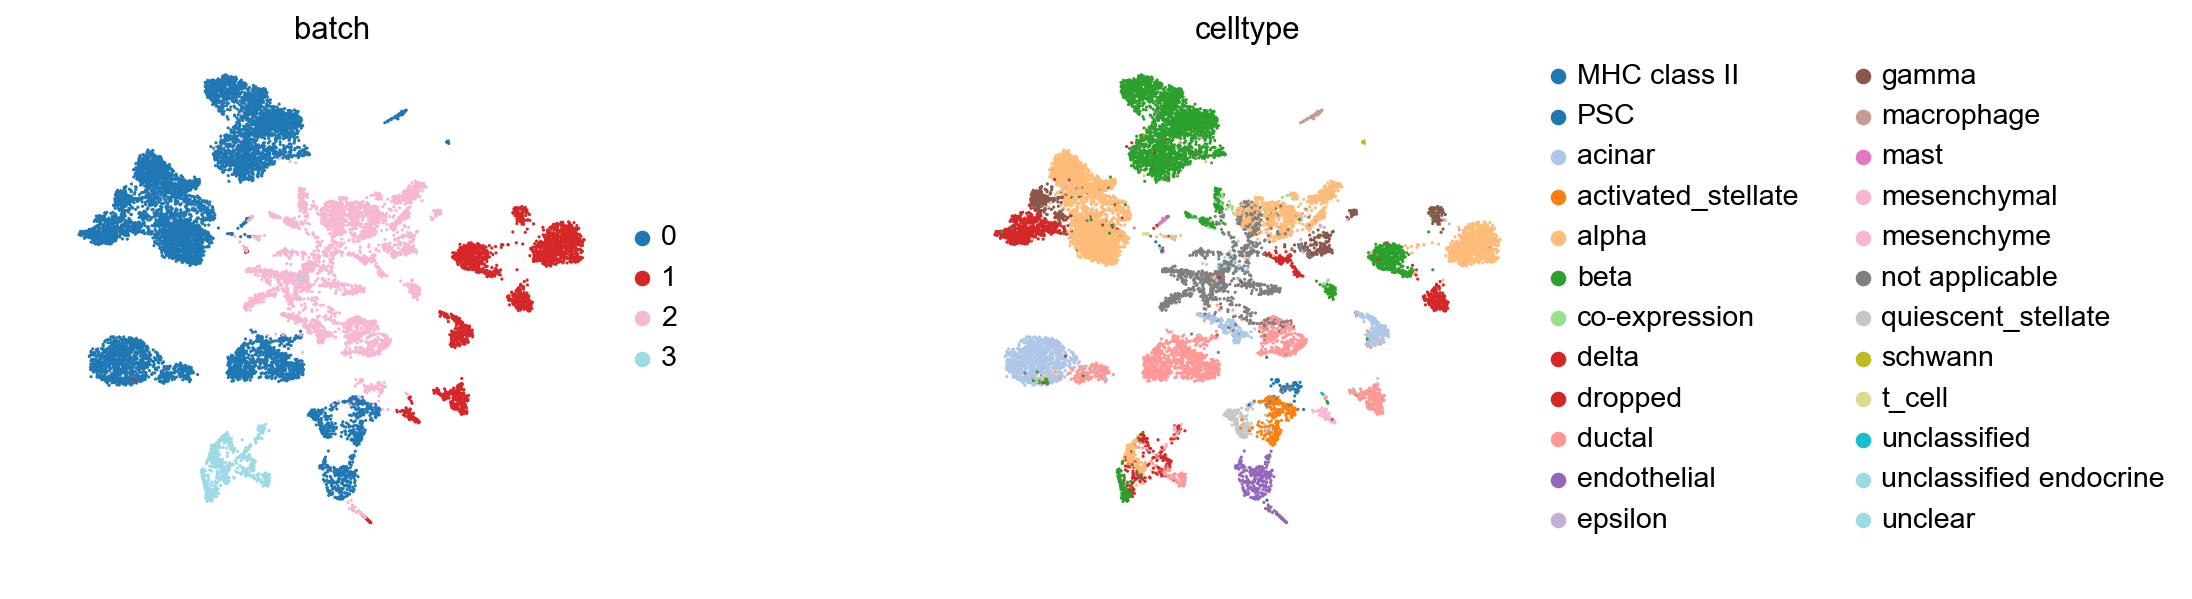

In [6]:
sc.pl.umap(ad, color=['batch', 'celltype'], wspace=.5, palette='tab20')

## Mapping into reference

In [7]:
ad_ref = ad[ad.obs.batch == '0'].copy()

/Users/alexwolf/repos/anndata/anndata/_core/anndata.py:1125: DeprecationWarning: During AnnData slicing, found matrix at .obs['neighbors']['distances'] that happens to be dimensioned at n_obs×n_obs (14693×14693). This slicing behavior will soon go away.
  DeprecationWarning,
/Users/alexwolf/repos/anndata/anndata/_core/anndata.py:1125: DeprecationWarning: During AnnData slicing, found matrix at .obs['neighbors']['connectivities'] that happens to be dimensioned at n_obs×n_obs (14693×14693). This slicing behavior will soon go away.
  DeprecationWarning,


Compute the PCA, neighbors and UMAP on the reference data.

In [8]:
sc.pp.pca(ad_ref)
sc.pp.neighbors(ad_ref)
sc.tl.umap(ad_ref)

computing PCA with n_comps = 50
    finished (0:00:01)
computing neighbors
    using 'X_pca' with n_pcs = 50


/Users/alexwolf/repos/scanpy/scanpy/neighbors/__init__.py:104: DeprecationWarning: Use is_view instead of isview, isview will be removed in the future.
  if adata.isview:  # we shouldn't need this here...


    finished (0:00:02)
computing UMAP
    finished (0:00:10)


The actual integration.

In [9]:
ad_3 = ad[ad.obs.batch == '3'].copy()
ad_joint = sc.tl.ingest(ad_3, ad_ref, obs='celltype', batch_key='ing_batch', return_joint=True)
ad_2 = ad[ad.obs.batch == '2'].copy()
ad_joint = sc.tl.ingest(ad_2, ad_joint, obs='celltype', batch_key='ing_batch', return_joint=True)
# ad_1 = ad[ad.obs.batch == '1'].copy()  # this doesn't yet work, will be fixed asap
# ad_joint = sc.tl.ingest(ad_1, ad_joint, obs='celltype', batch_key='ing_batch', return_joint=True)

running ingest


/Users/alexwolf/repos/anndata/anndata/_core/anndata.py:1125: DeprecationWarning: During AnnData slicing, found matrix at .obs['neighbors']['distances'] that happens to be dimensioned at n_obs×n_obs (14693×14693). This slicing behavior will soon go away.
  DeprecationWarning,
/Users/alexwolf/repos/anndata/anndata/_core/anndata.py:1125: DeprecationWarning: During AnnData slicing, found matrix at .obs['neighbors']['connectivities'] that happens to be dimensioned at n_obs×n_obs (14693×14693). This slicing behavior will soon go away.
  DeprecationWarning,


    finished (0:00:05)
running ingest


/Users/alexwolf/repos/anndata/anndata/_core/anndata.py:1125: DeprecationWarning: During AnnData slicing, found matrix at .obs['neighbors']['distances'] that happens to be dimensioned at n_obs×n_obs (14693×14693). This slicing behavior will soon go away.
  DeprecationWarning,
/Users/alexwolf/repos/anndata/anndata/_core/anndata.py:1125: DeprecationWarning: During AnnData slicing, found matrix at .obs['neighbors']['connectivities'] that happens to be dimensioned at n_obs×n_obs (14693×14693). This slicing behavior will soon go away.
  DeprecationWarning,


    finished (0:00:04)


... storing 'batch' as categorical
... storing 'celltype' as categorical
... storing 'louvain' as categorical
... storing 'sample' as categorical


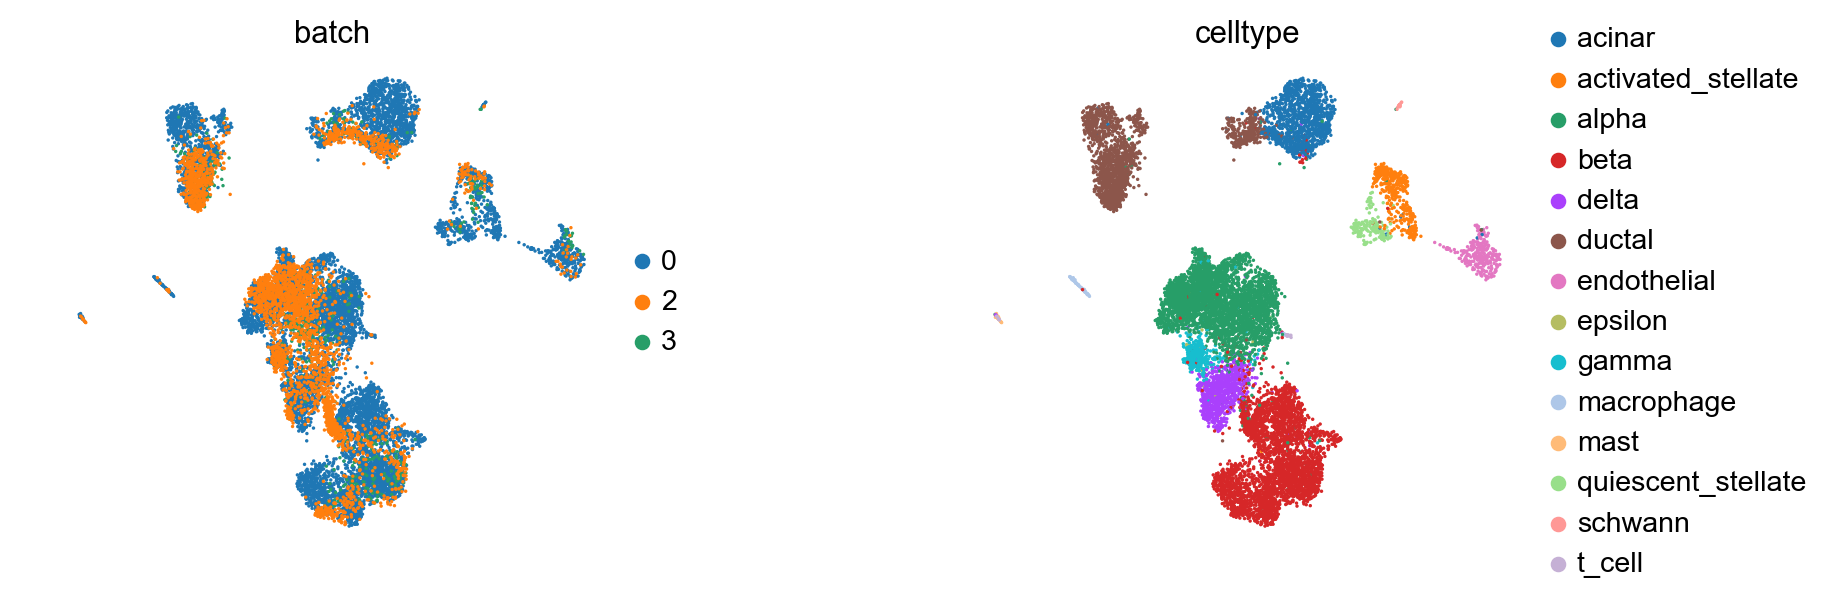

In [10]:
sc.pl.umap(ad_joint, color=['batch', 'celltype'], wspace=.5)

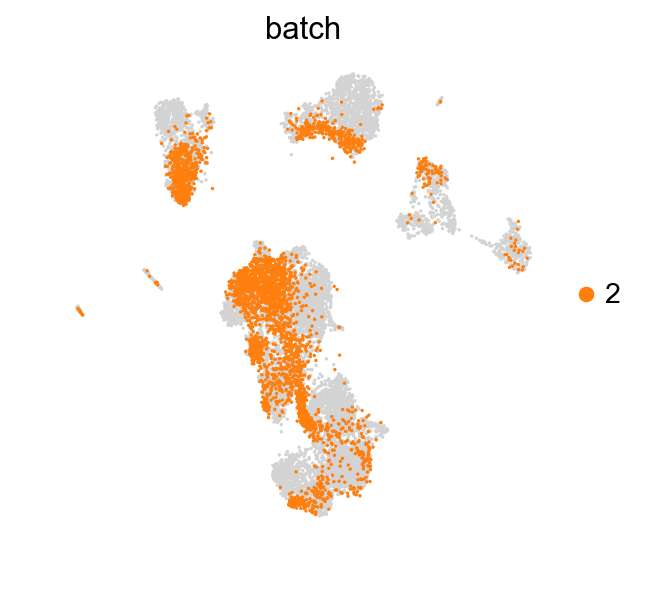

In [12]:
sc.pl.umap(ad_joint, color='batch', groups=['2'])

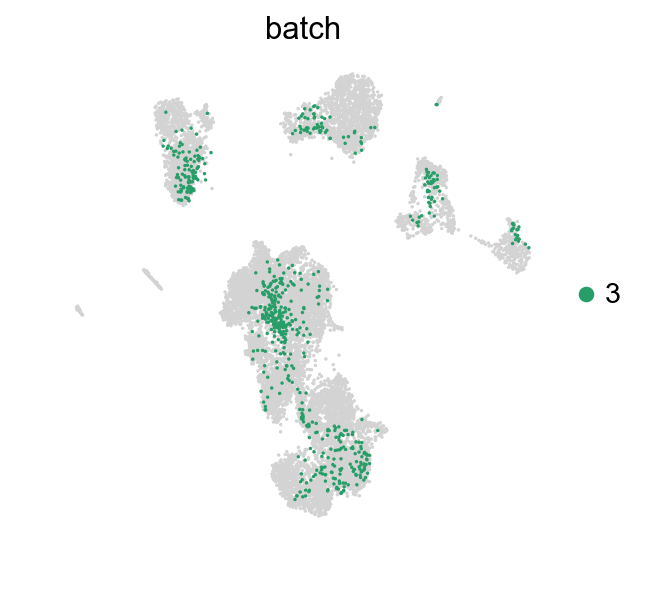

In [13]:
sc.pl.umap(ad_joint, color='batch', groups=['3'])